<a href="https://colab.research.google.com/github/jithemji/Like_Prediction_Model/blob/main/Audio/feature_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv('/content/drive/MyDrive/video content analysis/data.csv')

In [7]:
df

,Unnamed: 0,spec_bw_mean,spec_bw_med,spec_bw_std,spec_bw_max,spec_bw_min,spec_rolloff_mean,spec_rolloff_med,spec_rolloff_std,spec_rolloff_max,spec_rolloff_min,spec_cent_mean,spec_cent_med,spec_cent_std,spec_cent_max,spec_cent_min,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,mfcc1_med,mfcc2_med,mfcc3_med,mfcc4_med,...,chr4_std,chr5_std,chr6_std,chr7_std,chr8_std,chr9_std,chr10_std,chr11_std,chr12_std,chr1_max,chr2_max,chr3_max,chr4_max,chr5_max,chr6_max,chr7_max,chr8_max,chr9_max,chr10_max,chr11_max,chr12_max,chr1_min,chr2_min,chr3_min,chr4_min,chr5_min,chr6_min,chr7_min,chr8_min,chr9_min,chr10_min,chr11_min,chr12_min,zcrr_mean,zcrr_med,zcrr_std,zcrr_max,zcrr_min,zcr,views
0,1,2030.179674,1959.794710,767.787559,4030.921517,0.000000,3525.032766,2530.151367,2676.325996,9808.374023,0.000000,1774.638080,1259.221313,1358.294604,7224.937542,0.000000,-311.057678,94.171326,34.061352,29.690777,11.202586,-3.855678,-14.581732,-7.805006,-11.418423,-4.223622,-10.954490,-4.522069,-10.953578,-11.617891,-7.339822,-7.037759,-12.195661,-8.960283,-8.032277,-4.617074,-302.867523,99.676758,33.680344,27.779488,...,0.313277,0.304166,0.284614,0.283951,0.310423,0.312458,0.356056,0.327770,0.311138,1,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085045,0,0,0,0,2227741,8851
1,2,1967.731461,1845.441185,770.644383,4083.123843,0.000000,3401.332634,2519.384766,2615.419731,9969.873047,0.000000,1718.093009,1187.677272,1352.818225,7398.308626,0.000000,-361.651764,91.266083,32.434723,34.830757,11.771287,-8.585844,-8.699321,-8.397955,-10.665344,-2.073390,-9.737555,-2.214098,-9.429249,-11.337292,-6.260693,-6.980236,-11.093098,-7.290222,-8.240770,-6.332847,-356.499817,97.972839,31.938801,30.880535,...,0.306892,0.297565,0.284198,0.274651,0.309688,0.310720,0.358056,0.345166,0.339502,1,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083942,0,0,0,0,3999863,9309
2,3,2044.636279,1982.546630,729.270852,4007.884699,0.000000,3568.594847,2670.117188,2577.664876,9819.140625,0.000000,1802.686516,1324.612270,1365.368198,7236.673217,0.000000,-347.294312,86.350319,31.360334,27.287346,9.481331,-3.302117,-13.474671,-5.922333,-8.130700,-2.624264,-10.443044,-4.017173,-11.584930,-11.529947,-4.872400,-7.373795,-12.066875,-7.782693,-6.797484,-4.689390,-343.298096,90.184151,30.702362,26.429190,...,0.322622,0.305208,0.294705,0.292014,0.323169,0.326954,0.359934,0.350636,0.332649,1,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086255,0,0,0,0,4987522,7308
3,4,1959.562193,1813.899556,702.683395,3817.752630,0.000000,3520.755915,2745.483398,2412.516224,9754.541016,0.000000,1786.806745,1311.626942,1270.340341,7162.829820,0.000000,-235.007584,93.845879,19.240696,37.409462,8.292507,-6.540430,-11.751071,-9.049055,-14.196241,-1.067007,-10.400985,-1.162823,-5.652502,-9.449134,-6.270150,-6.208694,-11.589703,-4.522139,-5.999825,-6.438097,-219.741196,105.073891,23.469452,32.754745,...,0.311734,0.309946,0.306484,0.333297,0.355568,0.327954,0.341778,0.330263,0.332495,1,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089454,0,0,0,0,2594549,4099
4,5,2154.297542,2206.503147,712.111477,3984.520622,0.000000,4075.635357,4177.441406,2530.993395,9894.506836,0.000000,2025.634398,1786.966229,1347.233446,7493.963012,0.000000,-320.463348,74.869011,30.760990,42.097054,8.144476,-4.258576,-4.178467,-10.357195,-9.733069,-2.317397,-9.527082,-0.947373,-8.525039,-11.315473,-7.922903,-6.040540,-10.546000,-5.438093,-7.231313,-6.406849,-323.665558,71.068001,28.088217,36.023403,...,0.297025,0.293111,0.277619,0.290

In [8]:
column=['Unnamed: 0','chr1_max','chr2_max','chr3_max','chr4_max','chr5_max','chr6_max','chr7_max','chr8_max','chr9_max','chr10_max','chr11_max','chr12_max','zcrr_med','zcrr_std','zcrr_max','zcrr_min']

In [9]:
df.drop(columns=column,inplace=True)
df

,spec_bw_mean,spec_bw_med,spec_bw_std,spec_bw_max,spec_bw_min,spec_rolloff_mean,spec_rolloff_med,spec_rolloff_std,spec_rolloff_max,spec_rolloff_min,spec_cent_mean,spec_cent_med,spec_cent_std,spec_cent_max,spec_cent_min,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,mfcc1_med,mfcc2_med,mfcc3_med,mfcc4_med,mfcc5_med,...,chr12_mean,chr1_med,chr2_med,chr3_med,chr4_med,chr5_med,chr6_med,chr7_med,chr8_med,chr9_med,chr10_med,chr11_med,chr12_med,chr1_std,chr2_std,chr3_std,chr4_std,chr5_std,chr6_std,chr7_std,chr8_std,chr9_std,chr10_std,chr11_std,chr12_std,chr1_min,chr2_min,chr3_min,chr4_min,chr5_min,chr6_min,chr7_min,chr8_min,chr9_min,chr10_min,chr11_min,chr12_min,zcrr_mean,zcr,views
0,2030.179674,1959.794710,767.787559,4030.921517,0.000000,3525.032766,2530.151367,2676.325996,9808.374023,0.000000,1774.638080,1259.221313,1358.294604,7224.937542,0.000000,-311.057678,94.171326,34.061352,29.690777,11.202586,-3.855678,-14.581732,-7.805006,-11.418423,-4.223622,-10.954490,-4.522069,-10.953578,-11.617891,-7.339822,-7.037759,-12.195661,-8.960283,-8.032277,-4.617074,-302.867523,99.676758,33.680344,27.779488,15.607552,...,0.362284,0.373895,0.375181,0.331504,0.294499,0.250121,0.204111,0.206880,0.210823,0.233600,0.255084,0.279357,0.300021,0.353354,0.339554,0.330949,0.313277,0.304166,0.284614,0.283951,0.310423,0.312458,0.356056,0.327770,0.311138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085045,2227741,8851
1,1967.731461,1845.441185,770.644383,4083.123843,0.000000,3401.332634,2519.384766,2615.419731,9969.873047,0.000000,1718.093009,1187.677272,1352.818225,7398.308626,0.000000,-361.651764,91.266083,32.434723,34.830757,11.771287,-8.585844,-8.699321,-8.397955,-10.665344,-2.073390,-9.737555,-2.214098,-9.429249,-11.337292,-6.260693,-6.980236,-11.093098,-7.290222,-8.240770,-6.332847,-356.499817,97.972839,31.938801,30.880535,16.486835,...,0.443838,0.420458,0.332020,0.291383,0.272536,0.231558,0.193434,0.188717,0.205668,0.248714,0.316942,0.368900,0.405972,0.348692,0.313523,0.321017,0.306892,0.297565,0.284198,0.274651,0.309688,0.310720,0.358056,0.345166,0.339502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083942,3999863,9309
2,2044.636279,1982.546630,729.270852,4007.884699,0.000000,3568.594847,2670.117188,2577.664876,9819.140625,0.000000,1802.686516,1324.612270,1365.368198,7236.673217,0.000000,-347.294312,86.350319,31.360334,27.287346,9.481331,-3.302117,-13.474671,-5.922333,-8.130700,-2.624264,-10.443044,-4.017173,-11.584930,-11.529947,-4.872400,-7.373795,-12.066875,-7.782693,-6.797484,-4.689390,-343.298096,90.184151,30.702362,26.429190,15.532729,...,0.397113,0.324789,0.307450,0.294425,0.290289,0.256670,0.224955,0.234023,0.251732,0.286142,0.321467,0.347106,0.333221,0.333379,0.315661,0.319670,0.322622,0.305208,0.294705,0.292014,0.323169,0.326954,0.359934,0.350636,0.332649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086255,4987522,7308
3,1959.562193,1813.899556,702.683395,3817.752630,0.000000,3520.755915,2745.483398,2412.516224,9754.541016,0.000000,1786.806745,1311.626942,1270.340341,7162.829820,0.000000,-235.007584,93.845879,19.240696,37.409462,8.292507,-6.540430,-11.751071,-9.049055,-14.196241,-1.067007,-10.400985,-1.162823,-5.652502,-9.449134,-6.270150,-6.208694,-11.589703,-4.522139,-5.999825,-6.438097,-219.741196,105.073891,23.469452,32.754745,12.025507,...,0.392181,0.349638,0.335253,0.322988,0.287226,0.280475,0.257513,0.265621,0.291733,0.293131,0.305717,0.304173,0.334298,0.350225,0.326498,0.340490,0.311734,0.309946,0.306484,0.333297,0.355568,0.327954,0.341778,0.330263,0.332495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 166 entries, spec_bw_mean to views
dtypes: float64(164), int64(2)
memory usage: 10.5 KB


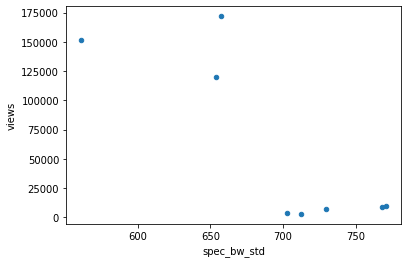

In [11]:
df.plot.scatter(x='spec_bw_std',y='views')

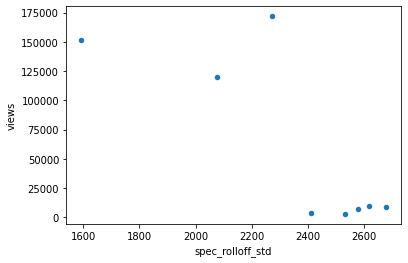

In [12]:
df.plot.scatter(x='spec_rolloff_std',y='views')

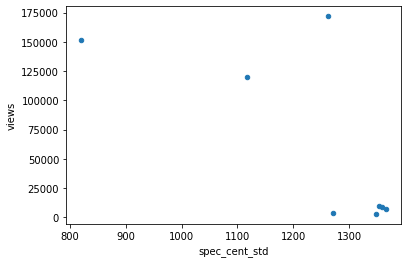

In [13]:
df.plot.scatter(x='spec_cent_std',y='views')

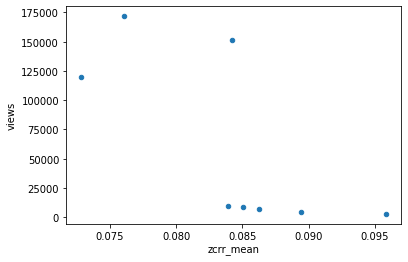

In [14]:
df.plot.scatter(x='zcrr_mean',y='views')

In [21]:
df.corr()

,spec_bw_mean,spec_bw_med,spec_bw_std,spec_bw_max,spec_bw_min,spec_rolloff_mean,spec_rolloff_med,spec_rolloff_std,spec_rolloff_max,spec_rolloff_min,spec_cent_mean,spec_cent_med,spec_cent_std,spec_cent_max,spec_cent_min,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,mfcc1_med,mfcc2_med,mfcc3_med,mfcc4_med,mfcc5_med,...,chr12_mean,chr1_med,chr2_med,chr3_med,chr4_med,chr5_med,chr6_med,chr7_med,chr8_med,chr9_med,chr10_med,chr11_med,chr12_med,chr1_std,chr2_std,chr3_std,chr4_std,chr5_std,chr6_std,chr7_std,chr8_std,chr9_std,chr10_std,chr11_std,chr12_std,chr1_min,chr2_min,chr3_min,chr4_min,chr5_min,chr6_min,chr7_min,chr8_min,chr9_min,chr10_min,chr11_min,chr12_min,zcrr_mean,zcr,views
spec_bw_mean,1.000000,0.985033,0.884477,0.754777,-0.678098,0.909155,0.617085,0.952107,0.879463,-0.955266,0.894276,0.538858,0.954907,0.763550,-0.881544,0.231786,-0.770219,0.954348,0.919683,-0.311769,-0.209585,-0.142888,-0.417253,0.861809,0.868828,-0.587846,0.808084,-0.767193,-0.739363,-0.783599,-0.607344,-0.628201,-0.198791,-0.676898,-0.050428,0.078700,-0.807343,0.945188,0.951347,0.208872,...,0.387133,0.772165,0.860808,0.764190,0.484914,0.233639,-0.249240,-0.186388,-0.359534,-0.583957,-0.679055,-0.625691,0.547875,0.828906,0.550136,0.611858,0.673747,0.395890,-0.264330,-0.254431,0.389686,-0.702147,0.433949,0.123414,0.560989,-0.520276,-0.712552,-0.625031,-0.934862,-0.962021,-0.915250,-0.959685,-0.924049,-0.941992,-0.966973,-0.542393,-0.599924,0.515906,0.481657,-0.822562
spec_bw_med,0.985033,1.000000,0.832138,0.673891,-0.709639,0.953643,0.719152,0.910826,0.808999,-0.894844,0.945022,0.656509,0.909373,0.690415,-0.871337,0.225952,-0.829614,0.934064,0.895791,-0.388945,-0.243721,-0.166093,-0.480117,0.864068,0.808144,-0.580846,0.744430,-0.782922,-0.767305,-0.817448,-0.639609,-0.635628,-0.229842,-0.696947,-0.132518,0.060676,-0.874907,0.915875,0.911032,0.128712,...,0.471615,0.833169,0.897009,0.730362,0.379848,0.127060,-0.278058,-0.214334,-0.409973,-0.626662,-0.711747,-0.603737,0.622222,0.862148,0.555392,0.538620,0.632614,0.278305,-0.250397,-0.291865,0.281185,-0.786807,0.338938,0.050283,0.615211,-0.559748,-0.732901,-0.657081,-0.881203,-0.916622,-0.881133,-0.899977,-0.901414,-0.916421,-0.915721,-0.582569,-0.630131,0.610565,0.527111,-0.817828
spec_bw_std,0.884477,0.832138,1.000000,0.745500,-0.689540,0.716668,0.279137,0.972038,0.837601,-0.907993,0.672821,0.174291,0.922406,0.674300,-0.854441,0.126673,-0.611383,0.969269,0.788676,-0.266817,-0.343234,-0.302608,-0.428114,0.787531,0.780352,-0.671721,0.653228,-0.831463,-0.771233,-0.757604,-0.657942,-0.683276,-0.389519,-0.761661,-0.082213,-0.003779,-0.629442,0.970670,0.837949,0.195384,...,0.194872,0.595903,0.678375,0.569151,0.420130,0.080532,-0.417379,-0.378365,-0.513588,-0.647223,-0.700615,-0.617240,0.339420,0.749738,0.618455,0.629621,0.737052,0.443010,-0.292390,-0.446982,0.245547,-0.544201,0.731892,0.400505,0.416109,-0.503496,-0.694742,-0.611411,-0.882053,-0.937832,-0.908406,-0.926506,-0.892670,-0.918802,-0.926414,-0.529771,-0.579166,0.322143,0.449249,-0.821788
spec_bw_max,0.754777,0.673891,0.745500,1.000000,-0.123441,0.436479,0.167785,0.796240,0.954138,-0.851905,0.423954,0.063527,0.863787,0.976186,-0.527756,-0.251281,-0.332022,0.708101,0.656295,0.364732,0.322865,0.347136,0.224841,0.704523,0.776419,-0.103607,0.770381,-0.339590,-0.212349,-0.260558,-0.033720,-0.105759,0.173438,-0.178906,0.557159,-0.328263,-0.379877,0.697465,0.759469,0.775251,...,0.101450,0.423402,0.540836,0.763935,0.862441,0.500119,-0.016983,0.121495,0.149994,-0.013542,-0.116474,-0.268545,0.260890,0.326278,0.070647,0.372052,0.402903,0.365193,-0.291463,-0.198294,0.486097,-0.352370,0.443911,0.075519,0.063299,-0.110108,-0.284946,-0.179722,-0.830657,-0.711834,-0.583495,-0.804433,-0.616447,-0.610741,-0.793991,-0.103173,-0.200205,-0.151379,0.134219,-0.350232
spec_bw_min,-0.678098,-0.709639

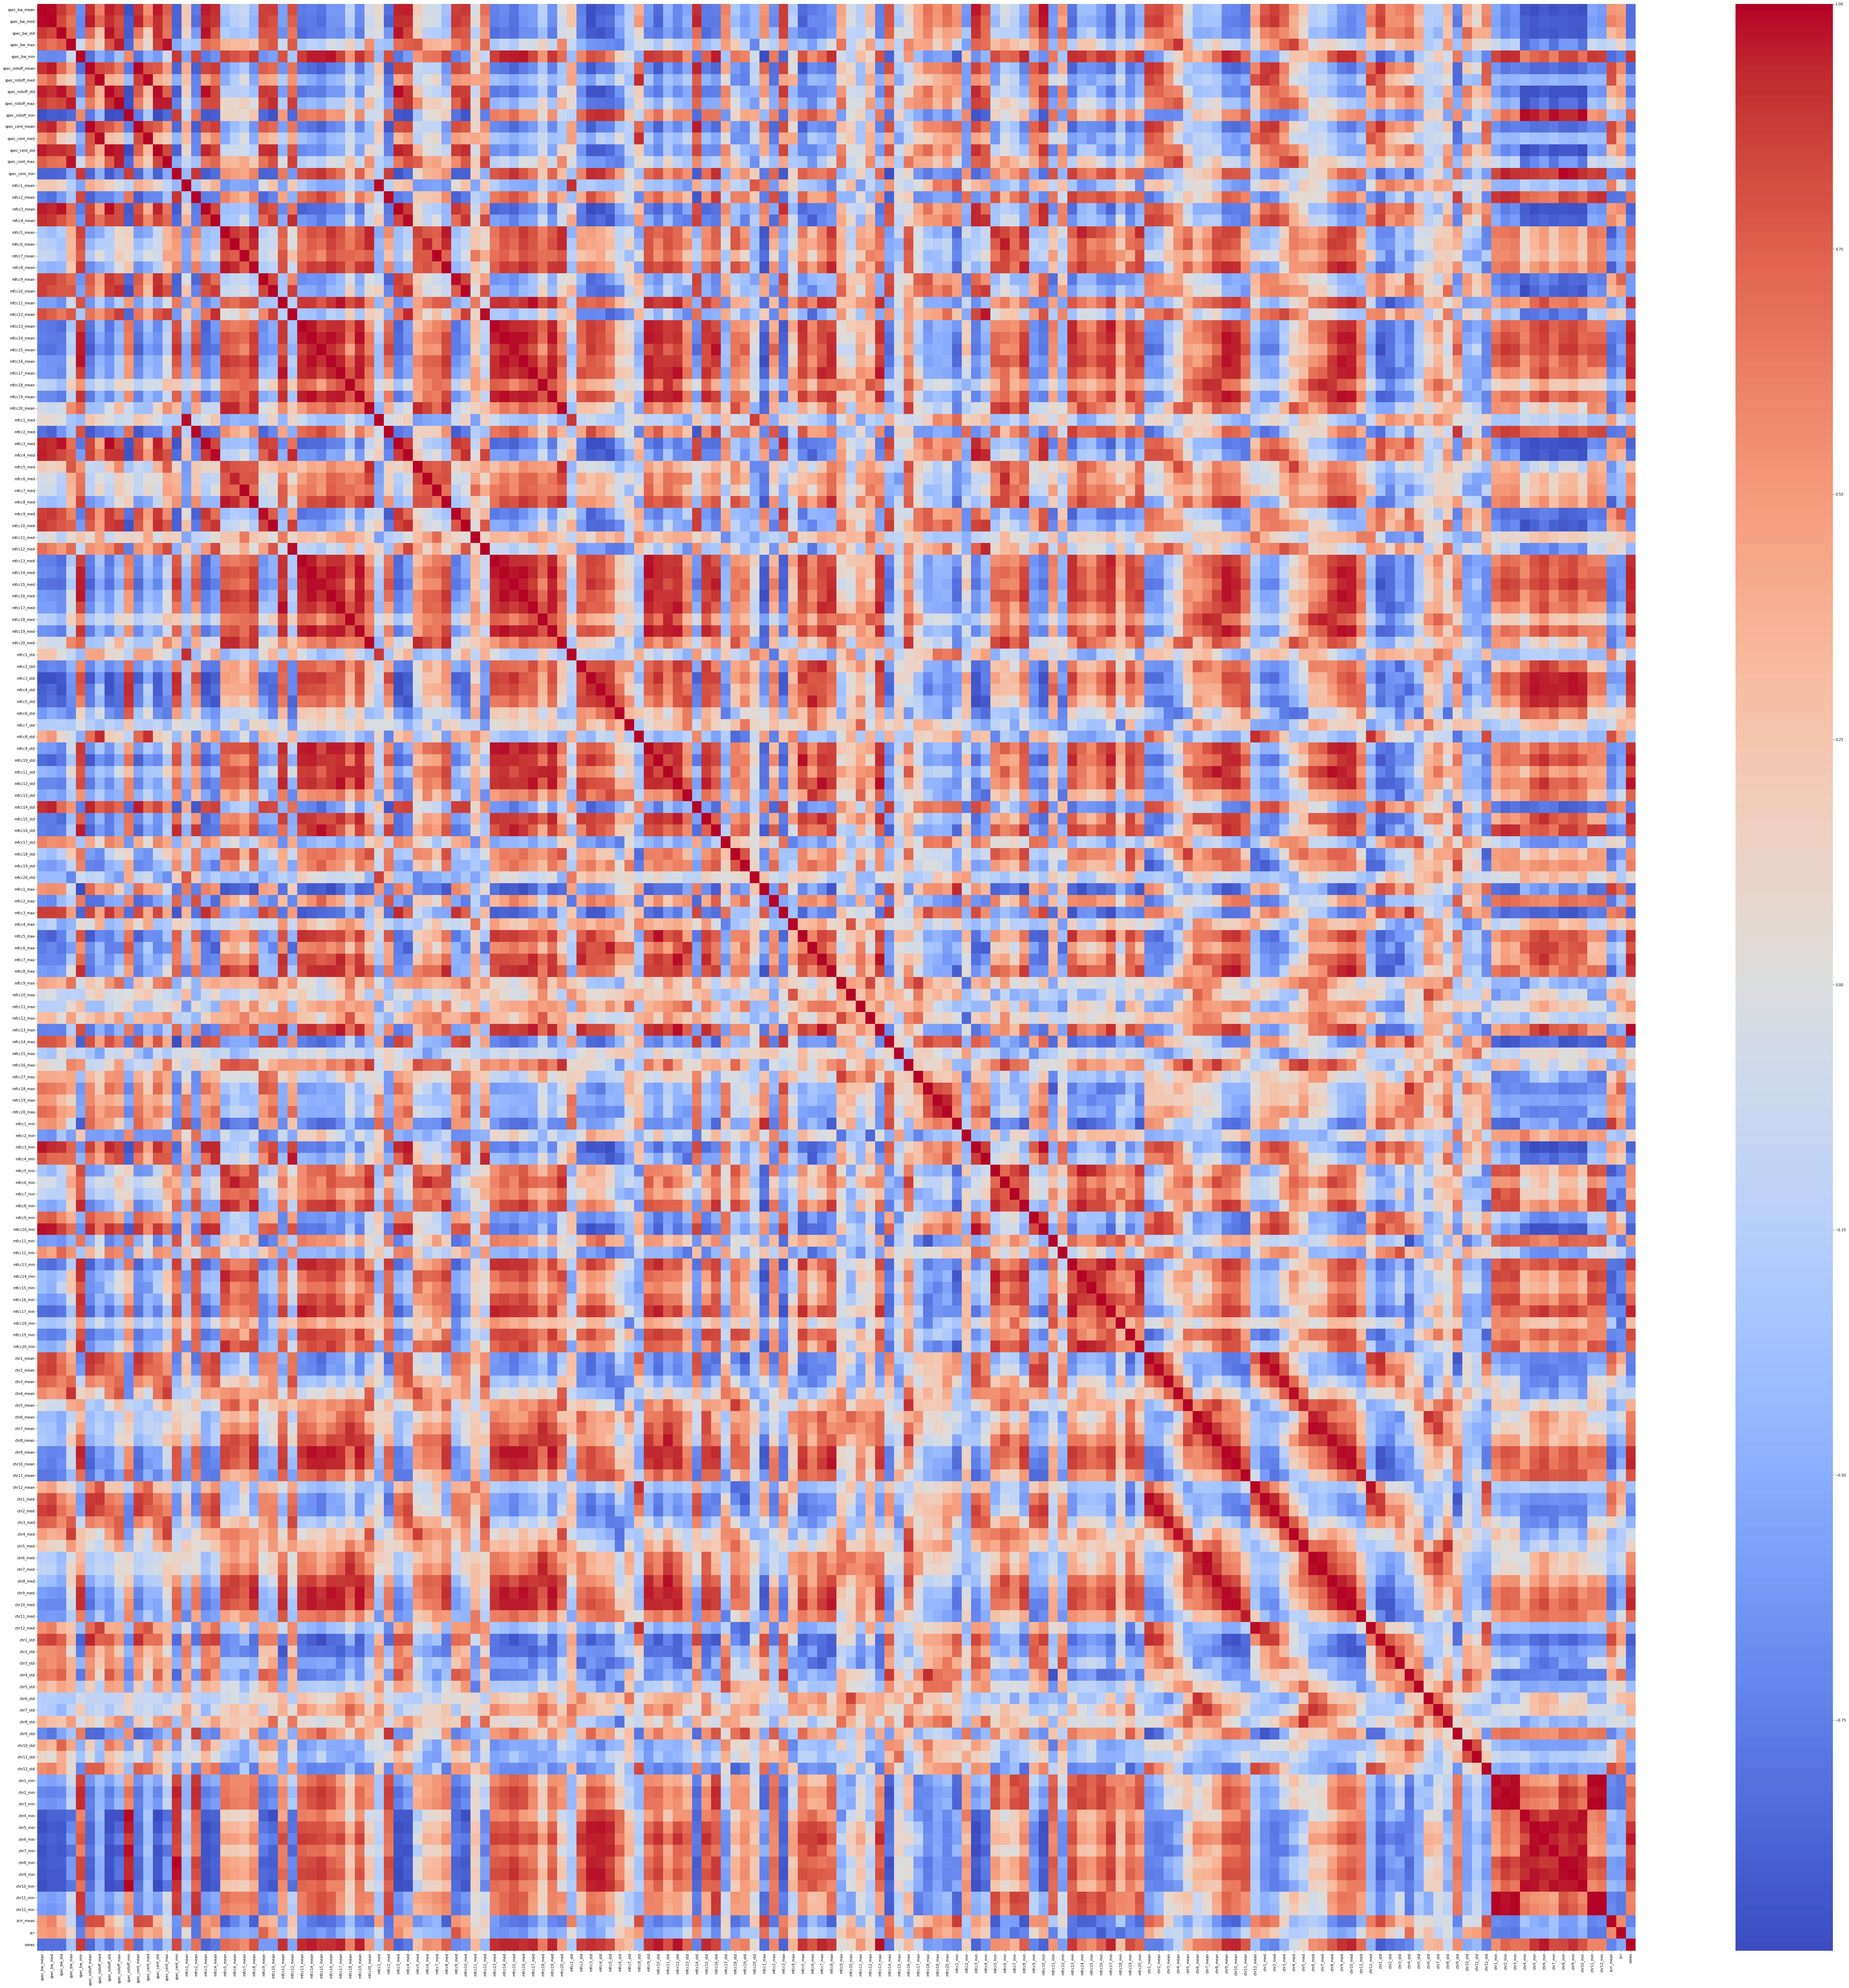

In [16]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(),cmap='coolwarm')

from this heat map-


1.   mean values of chroma vector are highly correlated to median values of chroma vector
2.   mean values of mfcc vector are highly correlated to median values of mfcc vector
3.   



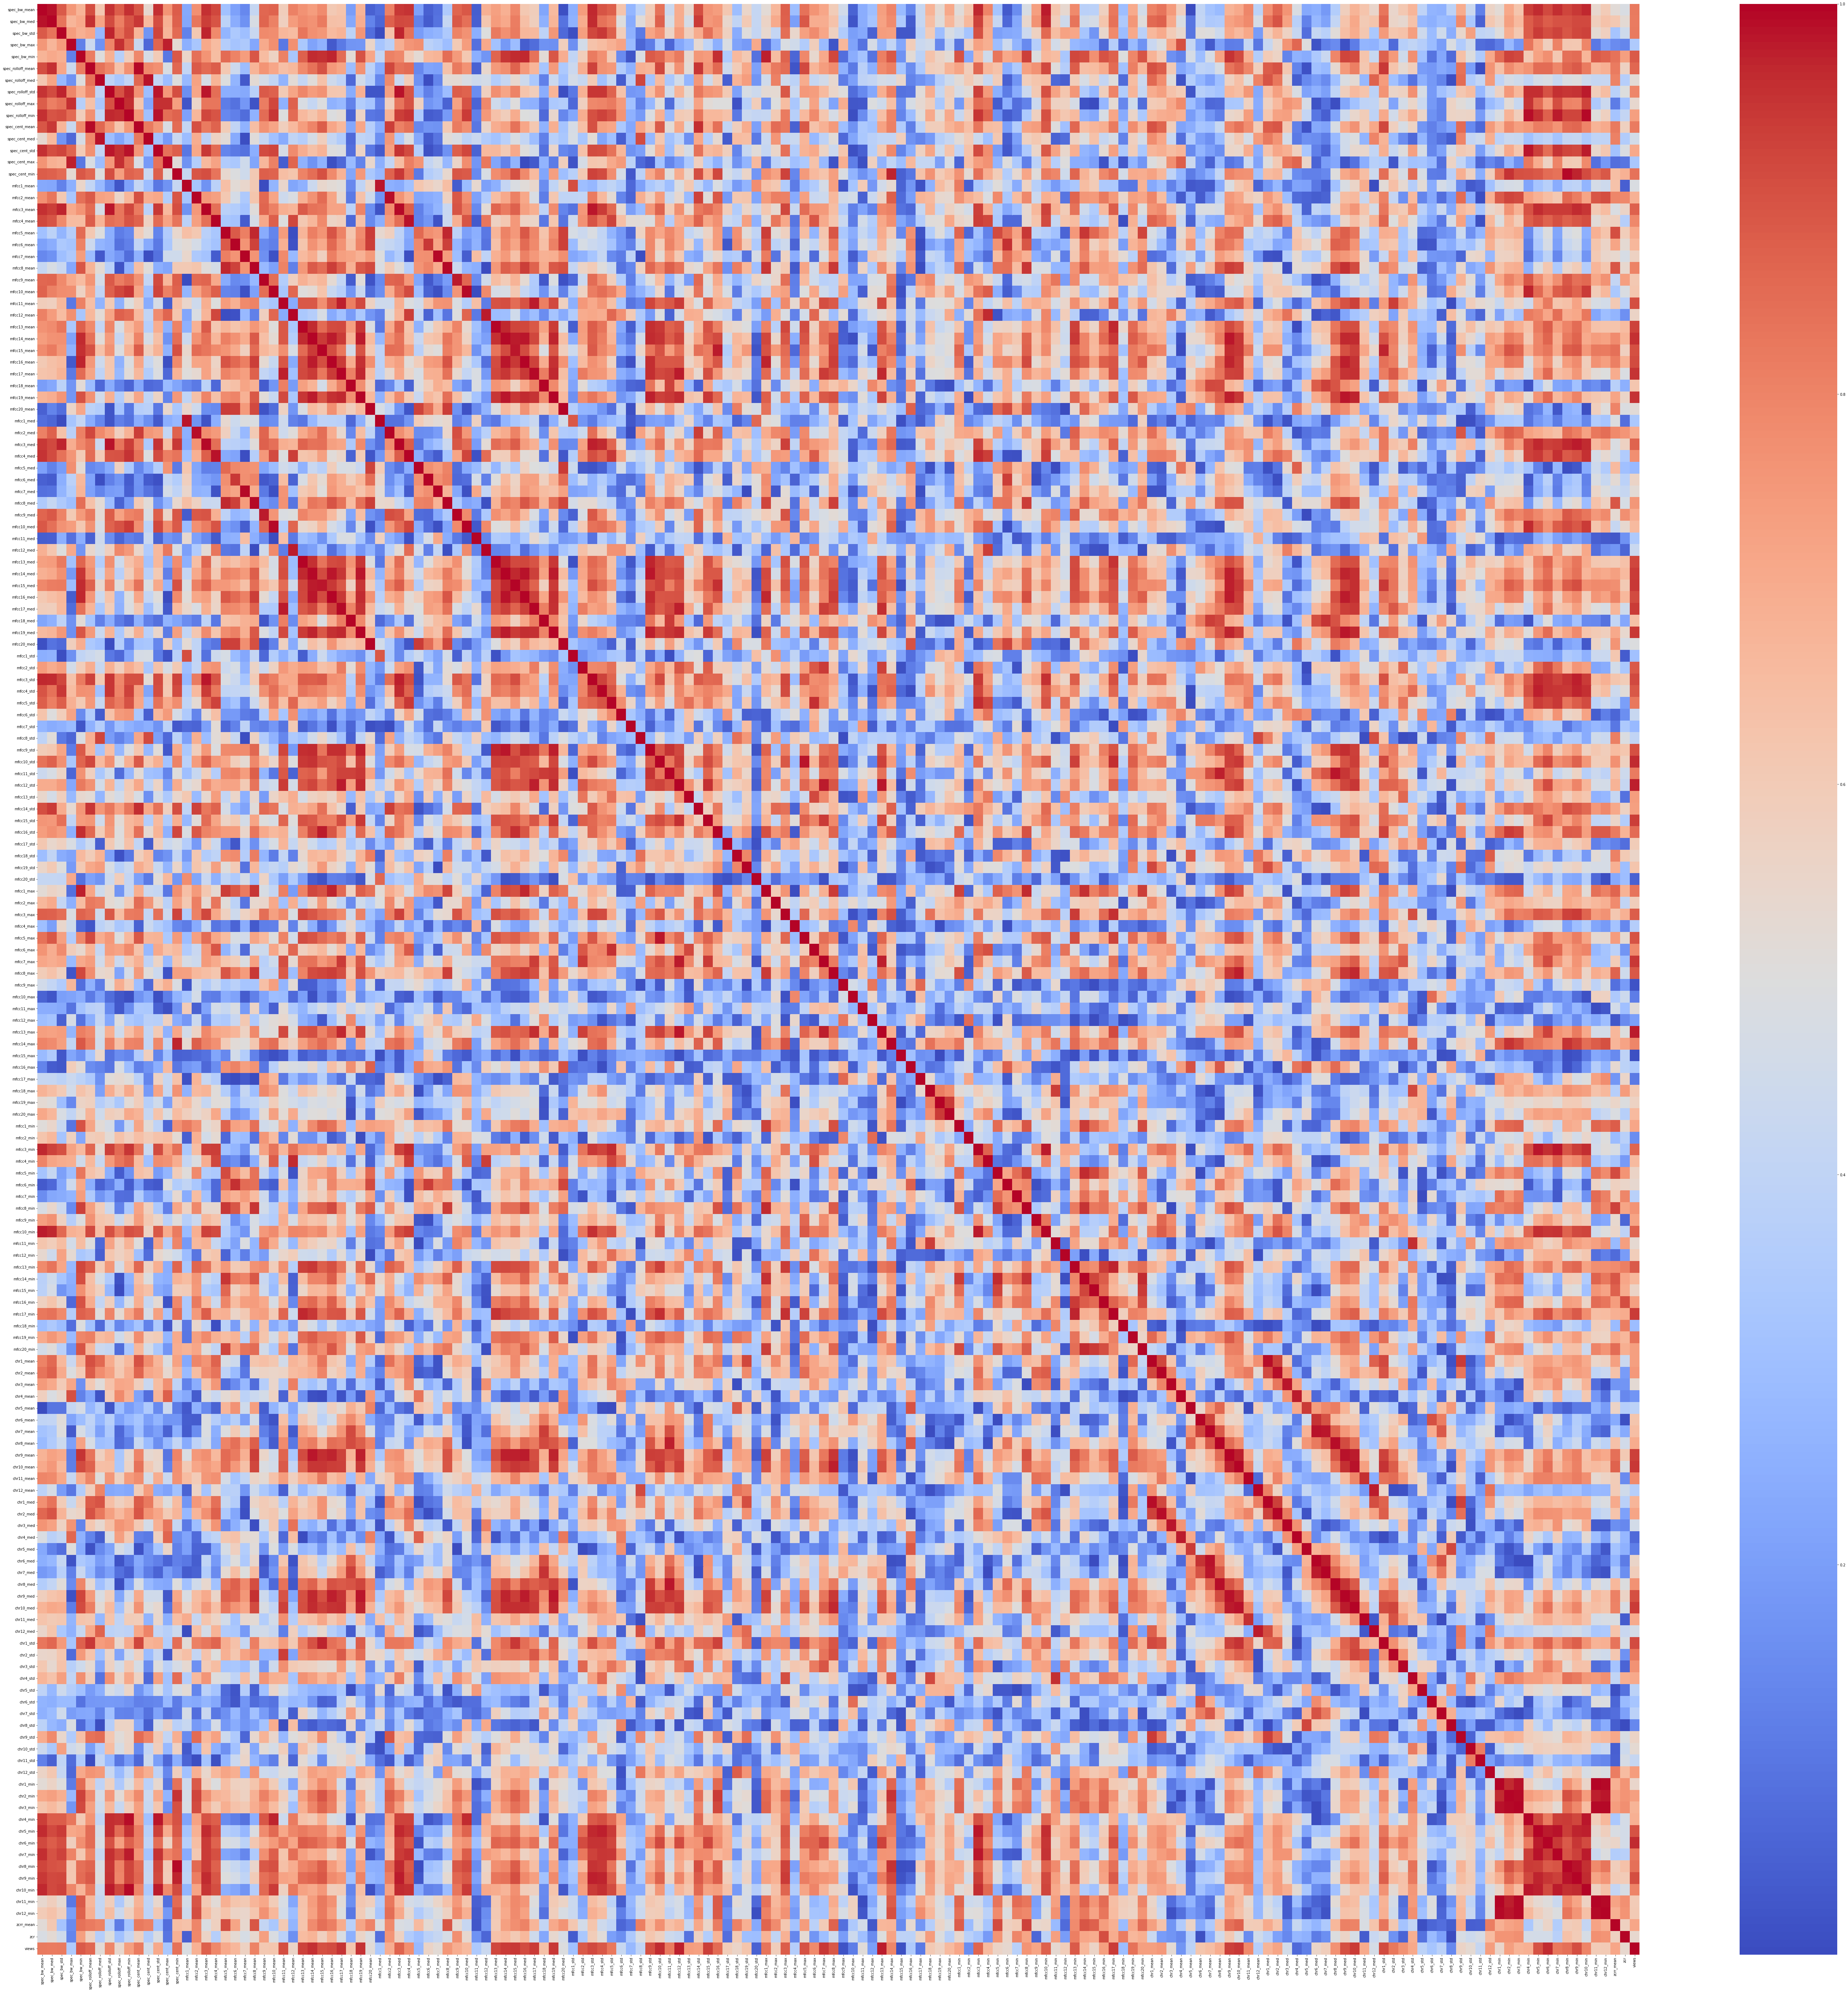

In [61]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr().abs(),cmap='coolwarm')

In [60]:
df.corr().abs()>0.5

,spec_bw_mean,spec_bw_med,spec_bw_std,spec_bw_max,spec_bw_min,spec_rolloff_mean,spec_rolloff_med,spec_rolloff_std,spec_rolloff_max,spec_rolloff_min,spec_cent_mean,spec_cent_med,spec_cent_std,spec_cent_max,spec_cent_min,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,mfcc1_med,mfcc2_med,mfcc3_med,mfcc4_med,mfcc5_med,...,chr12_mean,chr1_med,chr2_med,chr3_med,chr4_med,chr5_med,chr6_med,chr7_med,chr8_med,chr9_med,chr10_med,chr11_med,chr12_med,chr1_std,chr2_std,chr3_std,chr4_std,chr5_std,chr6_std,chr7_std,chr8_std,chr9_std,chr10_std,chr11_std,chr12_std,chr1_min,chr2_min,chr3_min,chr4_min,chr5_min,chr6_min,chr7_min,chr8_min,chr9_min,chr10_min,chr11_min,chr12_min,zcrr_mean,zcr,views
spec_bw_mean,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,False,False,True,True,True,False,...,False,True,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
spec_bw_med,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,False,False,True,True,True,False,...,False,True,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
spec_bw_std,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,False,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,False,False,True,True,True,False,...,False,True,True,True,False,False,False,False,True,True,True,True,False,True,True,True,True,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True
spec_bw_max,True,True,True,True,False,False,False,True,True,True,False,False,True,True,True,False,False,True,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,False,True,True,True,...,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False
spec_bw_min,True,True,True,False,True,True,True,True,False,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,...,False,True,True,False,False,False,False,False,True,True,True,True,False,True,True,False,True,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr11_min,True,True,True,False,True,True,False,True,False,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,False,True,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,False,True,False,True,False,False,True,False,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
chr12_min,True,True,True,False,True,True,False,True,False,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,True,

In [65]:
column_name=[]
for i in range(165):
  if(df.corr().abs().iloc[i,165]>0.9):
    column_name.append(i)
column_name

[25,
 27,
 28,
 29,
 30,
 31,
 33,
 47,
 48,
 49,
 50,
 51,
 53,
 57,
 63,
 64,
 66,
 69,
 79,
 81,
 87,
 111,
 123,
 124,
 135,
 136,
 139,
 156,
 159]

In [66]:
len(column_name)

29

29 attributes have absolute value of correlation coefficient more than 0.9 out of which 28 attributes have postive correlation coefficient and only 1 has negative correlation coefficient


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
